In [6]:
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


check ths fir better result 
https://www.calculatoratoz.com/en/polydispersity-index-for-step-reaction-polymers-calculator/Calc-33738

# Polymer PDI calculator and distribution generator

In [89]:
# Input
#Constants
waterMw = 18.01 # g/mol
liquidDensity = 1.03 # kg/m³ 
avoNumber = 6.023E+23

# Input
#polymerMw_input = input("Enter polymerMw values separated by commas: ")
#polymerMw_values = [float(value) for value in polymerMw_input.split(',')]
ensembleSize = float(input("What is the size of simulation (cube) in nm? "))
percentPolymer = float(input("What % in w/v of polymer solution you need? ")) / 100
boxSize = ((ensembleSize * ensembleSize * ensembleSize) * 1e-21)  # conversion from nm3 to cm3

What is the size of simulation (cube) in nm?  2053
What % in w/v of polymer solution you need?  10


## PDI calculator

     1) Cooke, D.M. and Shi, A.C., 2006. Effects of polydispersity on phase behavior of diblock copolymers. Macromolecules, 39(19), pp.6661-6671.
    
    2) Stockmayer, W.H., 1952. Molecular distribution in condensation polymers. Journal of polymer science, 9(1), pp.69-71.

In [8]:
# because not explicitly counding the degree of polymerisatoin, Mn, which is the absolute value of polymerisation per polymer
# which is equivalent to average  polymerisation length/polymerisation length. Mn is used (implicit).
# the same argument above is applied to Mw of polymer
# PDI = Mw/Mn

# Input
#MW 
polymerMw_input = input("Enter polymerMw values separated by commas: ")
polymerMw_values = [float(value) for value in polymerMw_input.split(',')]

#Mn
polymerMn_input = input("Enter polymerMn values separated by commas: ")
polymerMn_values = [float(value) for value in polymerMn_input.split(',')]

#Function
def PDIofPolymersolution(polymerMw_values, polymerMn_values):
    total_result = 0
# Mw (averaging)
    for polymerMw in polymerMw_values:
        result = polymerMw
        total_result += result
        average_Mw = total_result / len(polymerMw_values)
# Mn
    for polymerMn in polymerMn_values:
        Mnresult = polymerMn
         
    return print(f'\n The PDI of the polymer solution with and Average Mw {round(average_Mw, 2)} kDa, with a range of Mn {min(polymerMn_values)} and {max(polymerMn_values)} is {round(average_Mw/Mnresult,2)} \n Please note that 1 Da = 1 g/mol', flush=True)

#Call Function
PDIofPolymersolution(polymerMw_values, polymerMn_values)

Enter polymerMw values separated by commas:  2067.19, 2147.29, 2010.05, 2079.15, 2197.46, 1995.08, 2720.96, 2534.71, 2473.58, 2512.65, 2525.66, 2527.59, 3415.62, 3352.58, 3391.55, 3125.33, 3399.59, 3202.25, 2963.07, 2799.03, 2765.78, 2750, 3400.54
Enter polymerMn values separated by commas:  23, 23, 23, 23, 23, 23, 23, 30, 30, 30, 30, 30, 30, 36, 36, 34, 36, 36, 36, 32, 32, 32, 36



 The PDI of the polymer solution with and Average Mw 2711.16 kDa, with a range of Mn 23.0 and 36.0 is 75.31 
 Please note that 1 Da = 1 g/mol


## Poplymer distribution generator/Packing suggestion, (i) Gaussian (ii) Stockmeyer (iii) Bimodal

### (i) Gaussian 

try again
try again
The peptide number is:       0
0   4.0
1   4.0
2   2.0
3   4.0
4   4.0
5   2.0
6   3.0
7   4.0
8   4.0
9   3.0
10  4.0
11  2.0
12  4.0
13  3.0
14  3.0
15  4.0
16  4.0
17  4.0
18  2.0
19  1.0
20  3.0
21  2.0
22  4.0, for a total peptide amount of 75.0


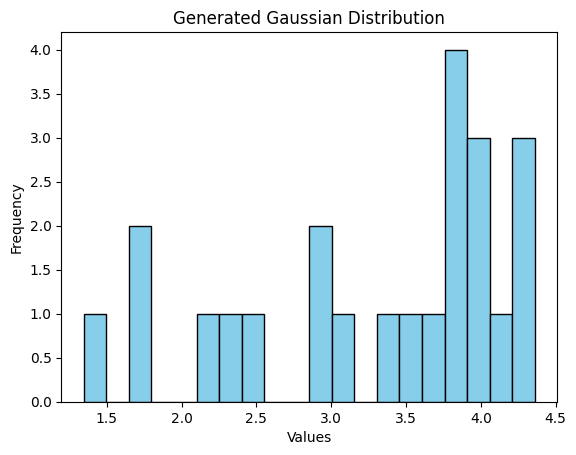

/var/folders/83/9bpqr3h13tggq3czlwty07m40000gs/T/ipykernel_29525/4101663385.py:38: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Gaussian_list)


<Axes: ylabel='Density'>

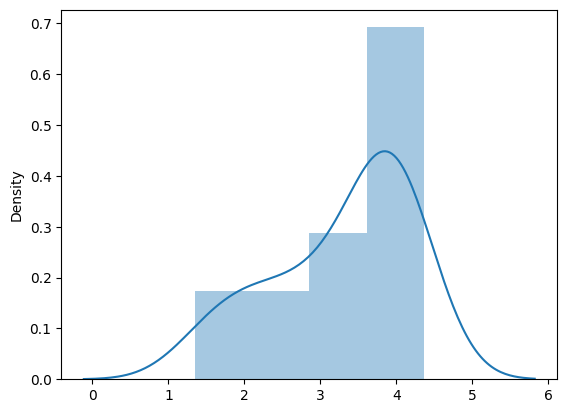

In [9]:
import numpy as np
import random
import matplotlib.pyplot as plt

def generate_gaussian_distribution(total_result, num_iterations):
    for _ in range(num_iterations):
        t = np.random.randint(1, 6, size=23)
        #p = [random.randint(1, 23) for _ in range(23)]
        mu = np.mean(t)
        sigma = np.std(t)
        Gaussian = np.random.normal(round(mu, 0), round(sigma, 0), 23)
        Gaussian_list = pd.DataFrame(Gaussian.tolist())
        gauss = sum(Gaussian.tolist())

        # Define the range of values within which gauss should fall
        lower_limit = total_result - 2
        upper_limit = total_result + 2

        if lower_limit <= gauss <= upper_limit:
            print(f'The peptide number is: {round(Gaussian_list,0)}, for a total peptide amount of {round(gauss,0)}')
            plot_histogram(Gaussian, title="Generated Gaussian Distribution")
            return Gaussian.tolist(), gauss
            break
        else:
            print('try again')

def plot_histogram(data, title="Histogram", xlabel="Values", ylabel="Frequency"):
    plt.hist(data, bins=20, color='skyblue', edgecolor='black')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

# Call the function with the desired total_result and number of iterations
Gaussian_list, gauss = generate_gaussian_distribution(total_result=76, num_iterations=5)  # Replace 5 with your desired number of iterations

import seaborn as sns
sns.distplot(Gaussian_list)

#### make cleaner

In [90]:
df1 = pd.DataFrame(polymerMw_values) 
df2 = pd.DataFrame(polymerMn_values)
df3 = pd.DataFrame(Gaussian_list)
df3 = round(df3,0)
box = 'Peptide Number in box size of ' + str(ensembleSize) + ' nm'
df1['Mw (Da)'] = pd.DataFrame(polymerMw_values) 
df2['Mn'] = pd.DataFrame(polymerMn_values)
df3['Column'] = pd.DataFrame(Gaussian_list)
df3['Column'] = round(df3['Column'],0)
df_ofPolymers = pd.concat([df1['Mw (Da)'],df2['Mn'],df3['Column']], axis=1)
df_ofPolymers = df_ofPolymers.rename(columns={'Column':box})
df_ofPolymers

,Mw (Da),Mn,Peptide Number in box size of 2053.0 nm
0,2067.19,23.0,4.0
1,2147.29,23.0,4.0
2,2010.05,23.0,2.0
3,2079.15,23.0,4.0
4,2197.46,23.0,4.0
5,1995.08,23.0,2.0
6,2720.96,23.0,3.0
7,2534.71,30.0,4.0
8,2473.58,30.0,4.0
9,2512.65,30.0,3.0


### (ii) Stockmeyer

The peptide number is: [ 1  1  2 10  1  3  3  3  2  3  2  1  6 10  1  8  5  1  6  4  3  8  1], for a total peptide amount of 75.0


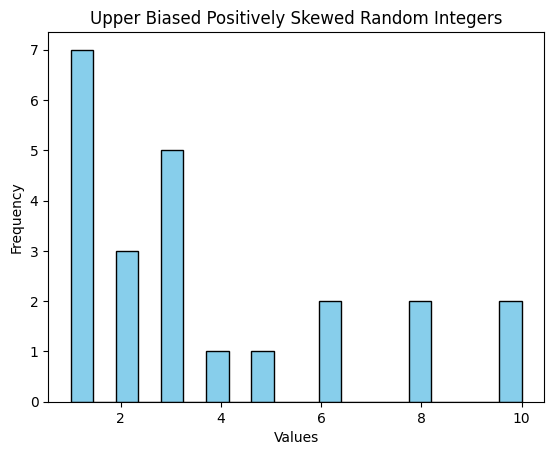

/var/folders/83/9bpqr3h13tggq3czlwty07m40000gs/T/ipykernel_29525/1890499606.py:34: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(upper_biased_positively_skewed_numbers)


<Axes: ylabel='Density'>

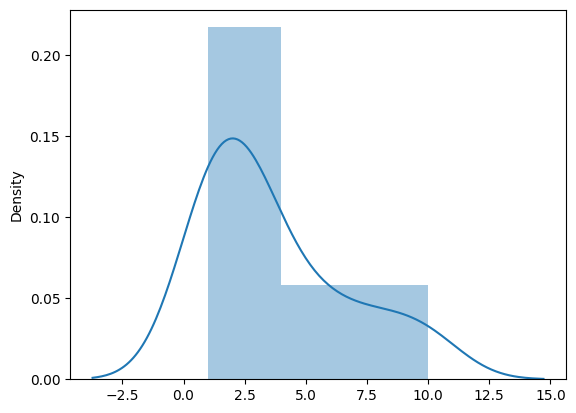

In [91]:
def generate_upper_biased_positively_skewed_random_integers(size, lower_bound, upper_bound, skewness_parameter, scale_parameter):
    # Generate random integers with positive skew and bias towards upper bounds within the specified range
    lower_bound = max(lower_bound, 1)  # Ensure lower_bound is at least 1
    upper_biased_integers = np.random.gamma(skewness_parameter, scale_parameter, size)
    upper_biased_integers = np.clip(upper_biased_integers, lower_bound, upper_bound)
    print(f'The peptide number is: {upper_biased_integers.astype(int)}, for a total peptide amount of {round(gauss,0)}')
    return upper_biased_integers.astype(int)

def plot_histogram(data, title="Histogram", xlabel="Values", ylabel="Frequency"):
    plt.hist(data, bins=20, color='skyblue', edgecolor='black')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

# Example usage
size_of_list = 23
lower_bound = 1
upper_bound = 10
skewness_parameter = 2  # Adjust the shape parameter for positive skewness
scale_parameter = 2  # Adjust the scale parameter for bias towards upper bounds

upper_biased_positively_skewed_numbers = generate_upper_biased_positively_skewed_random_integers(
    size_of_list, lower_bound, upper_bound, skewness_parameter, scale_parameter
)
# Plot the histogram
plot_histogram(
    upper_biased_positively_skewed_numbers,
    title="Upper Biased Positively Skewed Random Integers",
    xlabel="Values",
    ylabel="Frequency"
)
import seaborn as sns
sns.distplot(upper_biased_positively_skewed_numbers)

In [92]:
df1 = pd.DataFrame(polymerMw_values) 
df2 = pd.DataFrame(polymerMn_values)
df3 = pd.DataFrame(upper_biased_positively_skewed_numbers)
df3 = round(df3,0)
box = 'Peptide Number in box size of ' + str(ensembleSize) + ' nm'
df1['Mw (Da)'] = pd.DataFrame(polymerMw_values) 
df2['Mn'] = pd.DataFrame(polymerMn_values)
df3['Column'] = pd.DataFrame(upper_biased_positively_skewed_numbers)
df3['Column'] = round(df3['Column'],0)
df_ofPolymers = pd.concat([df1['Mw (Da)'],df2['Mn'],df3['Column']], axis=1)
df_ofPolymers = df_ofPolymers.rename(columns={'Column':box})
df_ofPolymers

,Mw (Da),Mn,Peptide Number in box size of 2053.0 nm
0,2067.19,23.0,1
1,2147.29,23.0,1
2,2010.05,23.0,2
3,2079.15,23.0,10
4,2197.46,23.0,1
5,1995.08,23.0,3
6,2720.96,23.0,3
7,2534.71,30.0,3
8,2473.58,30.0,2
9,2512.65,30.0,3


### (iii) Bimodal - toDo (fix this distibution) (03/04/24)

The peptide number is: [0.4535968  4.04876875 2.62916679 3.30229539 2.95852627 1.98009141
 3.24646046 3.77944055 4.80690912 3.25212171 3.43471729 2.90629404
 1.43820901 3.64023279 4.09787257 2.09934635 2.80156186 2.5613506
 3.74019057 4.29668926 2.45004287 3.45399048], for a total peptide amount of 34.0


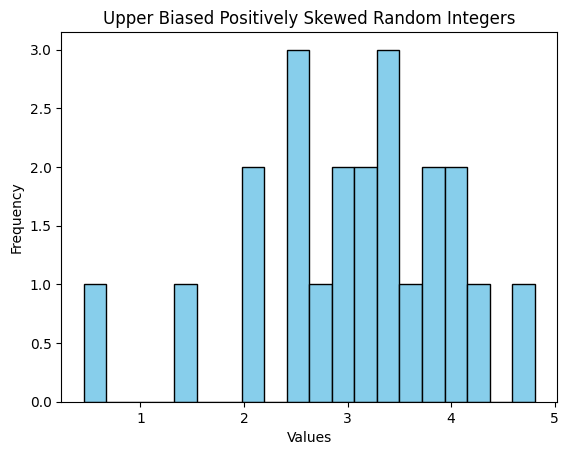

/var/folders/83/9bpqr3h13tggq3czlwty07m40000gs/T/ipykernel_29525/3079299117.py:24: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(bimode)


<Axes: ylabel='Density'>

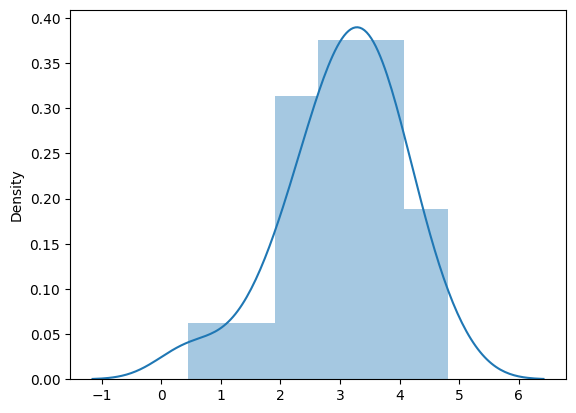

In [93]:
t = np.random.randint(1, 6, size=23)
mu = np.mean(t)
sigma = np.std(t)
Gaussian1 = np.random.normal(round(mu, 0), round(sigma, 0), 11)
Gaussian2 = np.random.normal(round(mu, 0), round(sigma, 0), 11)
g1 = Gaussian1.tolist()
g2 = Gaussian2.tolist()
gauss1 = pd.DataFrame(g1)
gauss2 = pd.DataFrame(g2)
gauss = sum(Gaussian1.tolist())

bimode = np.concatenate((Gaussian1, Gaussian2))
print(f'The peptide number is: {bimode}, for a total peptide amount of {round(gauss,0)}')

# Plot the histogram
plot_histogram(
    bimode,
    title="Upper Biased Positively Skewed Random Integers",
    xlabel="Values",
    ylabel="Frequency"
)

import seaborn as sns
sns.distplot(bimode)

### Write Packmol file (.inp)

#### Method 1

In [65]:
rm demoinput.inp

In [372]:
!touch demoinput.inp
with open("demoinput.inp", "a") as file:
    # write variables using repr() function
    data = round(gauss,0)
    line = str(data)
    line2 = 150
    line3 = 150 - 1
    file.write('''
# Packing of polymers in a box
# Using N.Tardiota Ph.D Packmol script generator
# All the atoms from diferent molecules will be separated at least 2.0
# Angstroms at the solution.

tolerance 2.0

# The file type of input and output files is PDB

filetype pdb

# The name of the output file

output mixture.pdb

# ''')
    file.write(repr(data) + ' ')
    file.write('''polymer molecules will be put in a box
# defined by the minimum coordinates x, y and z = 0. 0. 0. and maximum ''')
    file.write(repr(line2) + '.0 ' + repr(line2) + '.0 ' + repr(line2) + '.0 \n')
    file.write('\n structure ' )
    file.write('\n  number ' + repr(data))
    file.write('\n  inside box ' + ' 0. 0. 0. ' + repr(line3) + '.0 ' + repr(line3) + '.0 ' + repr(line3) + '.0 ')
    file.write("\n end structure")

In [373]:
#open and read the file after the appending:
f = open("demoinput.inp", "r")
print(f.read())


# Packing of polymers in a box
# Using N.Tardiota Packmol script generator
# All the atoms from diferent molecules will be separated at least 2.0
# Anstroms at the solution.

tolerance 2.0

# The file type of input and output files is PDB

filetype pdb

# The name of the output file

output mixture.pdb

# 75.0 polymer molecules will be put in a box
# defined by the minimum coordinates x, y and z = 150.0 150.0 150.0 

 structure
  number 75.0
  inside box  0. 0. 0. 149.0 149.0 149.0 
 end structure


#### Method 2

In [457]:
!touch demoinput.inp
with open("demoinput.inp", "w") as file:
    # write variables using repr() function
    data = round(gauss,0)
    line = str(data)
    line2 = 150
    line3 = 150 - 1
    file.write('''# Packing of polymers in a box
# Using N.Tardiota Ph.D Packmol script generator
# All the atoms from diferent molecules will be separated at least 2.0
# Angstroms at the solution.

tolerance 2.0

# The file type of input and output files is PDB

filetype pdb

# The name of the output file

output mixture.pdb

# ''')
    file.write(repr(data) + ' ')
    file.write('''polymer molecules will be put in a box
# defined by the minimum coordinates x, y and z = 0. 0. 0. and maximum ''')
    file.write(repr(line2) + '.0 ' + repr(line2) + '.0 ' + repr(line2) + '.0 \n')

In [458]:
with open("demoinput.inp", "a") as file:
    gg = len(Gaussian_list)
    df = pd.DataFrame(Gaussian_list)
    dd['Peptides'] = round(df,0)
    for i,j in zip(range(gg), dd['Peptides']):
        file.write('\n structure ' + str(i+1) +'.pdb' )
        file.write('\n  number ' + str(j))
        file.write('\n  inside box ' + ' 0. 0. 0. ' + repr(line3) + '.0 ' + repr(line3) + '.0 ' + repr(line3) + '.0 ')
        file.write("\n end structure \n")

In [459]:
#open and read the file after the appending:
f = open("demoinput.inp", "r")
print(f.read())


# Packing of polymers in a box
# Using N.Tardiota Packmol script generator
# All the atoms from diferent molecules will be separated at least 2.0
# Angstroms at the solution.

tolerance 2.0

# The file type of input and output files is PDB

filetype pdb

# The name of the output file

output mixture.pdb

# 75.0 polymer molecules will be put in a box
# defined by the minimum coordinates x, y and z = 150.0 150.0 150.0 

 structure 1.pdb
  number 2.0
  inside box  0. 0. 0. 149.0 149.0 149.0 
 end structure 

 structure 2.pdb
  number 5.0
  inside box  0. 0. 0. 149.0 149.0 149.0 
 end structure 

 structure 3.pdb
  number 4.0
  inside box  0. 0. 0. 149.0 149.0 149.0 
 end structure 

 structure 4.pdb
  number 3.0
  inside box  0. 0. 0. 149.0 149.0 149.0 
 end structure 

 structure 5.pdb
  number 4.0
  inside box  0. 0. 0. 149.0 149.0 149.0 
 end structure 

 structure 6.pdb
  number 2.0
  inside box  0. 0. 0. 149.0 149.0 149.0 
 end structure 

 structure 7.pdb
  number 4.0
  inside box 

#### Method 3

In [62]:
!touch demoinput.inp
with open("demoinput.inp", "w") as file:
    # write variables using repr() function
    data = round(gauss,0)
    line = str(data)
    line2 = 150
    line3 = 150 - 1
    file.write('''# Packing of polymers in a box
# Using N.Tardiota Ph.D Packmol script generator
# All the atoms from diferent molecules will be separated at least 2.0
# Angstroms at the solution.

tolerance 2.0

# The file type of input and output files is PDB

filetype pdb

# The name of the output file

output mixture.pdb

# ''')
    file.write(repr(data) + ' ')
    file.write('''polymer molecules will be put in a box
# defined by the minimum coordinates x, y and z = 0. 0. 0. and maximum ''')
    file.write(repr(line2) + '.0 ' + repr(line2) + '.0 ' + repr(line2) + '.0 \n')

In [63]:
with open("demoinput.inp", "a") as file:
    gg = len(Gaussian_list)
    df = pd.DataFrame(Gaussian_list)
    dd = round(df,0)
    dd['Peptides'] = dd
    for i, peptide_count in enumerate(dd['Peptides']):
        for _ in range(int(peptide_count)):
            file.write('\n structure ' + str(i+1) + '.pdb')
            file.write('\n  number 1')  # Writing '1' as the peptide number
            file.write('\n  inside box ' + ' 0. 0. 0. ' + repr(line3) + '.0 ' + repr(line3) + '.0 ' + repr(line3) + '.0 ')
            file.write("\n end structure \n")

In [64]:
#open and read the file after the appending:
f = open("demoinput.inp", "r")
print(f.read())

# Packing of polymers in a box
# Using N.Tardiota Ph.D Packmol script generator
# All the atoms from diferent molecules will be separated at least 2.0
# Angstroms at the solution.

tolerance 2.0

# The file type of input and output files is PDB

filetype pdb

# The name of the output file

output mixture.pdb

# 75.0 polymer molecules will be put in a box
# defined by the minimum coordinates x, y and z = 0. 0. 0. and maximum 150.0 150.0 150.0 

 structure 1.pdb
  number 1
  inside box  0. 0. 0. 149.0 149.0 149.0 
 end structure 

 structure 1.pdb
  number 1
  inside box  0. 0. 0. 149.0 149.0 149.0 
 end structure 

 structure 1.pdb
  number 1
  inside box  0. 0. 0. 149.0 149.0 149.0 
 end structure 

 structure 1.pdb
  number 1
  inside box  0. 0. 0. 149.0 149.0 149.0 
 end structure 

 structure 2.pdb
  number 1
  inside box  0. 0. 0. 149.0 149.0 149.0 
 end structure 

 structure 2.pdb
  number 1
  inside box  0. 0. 0. 149.0 149.0 149.0 
 end structure 

 structure 2.pdb
  number 1
  

In [55]:
ff = pd.DataFrame(Gaussian_list)
fd = round(ff,0)
pp = pd.DataFrame((str(fd)))
for i in pp:
    print(i)

ValueError: DataFrame constructor not properly called!